## Importing necessary libraries

In [1]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
import re
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score#, classification_report
from sklearn.pipeline import Pipeline
import pickle

## Loading the dataset

In [2]:
data = pd.read_csv(r"C:\Users\91852\Downloads\tripadvisor_hotel_reviews.csv\tripadvisor_hotel_reviews.csv")

In [3]:
data.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [4]:
data.shape

(20491, 2)

In [5]:
data.columns

Index(['Review', 'Rating'], dtype='object')

## Data Cleaning

In [6]:
data.isna().sum() #Check if there are any missing values in any of the columns

Review    0
Rating    0
dtype: int64

## Data Visualization

<Axes: title={'center': 'Box Plot for Ratings'}>

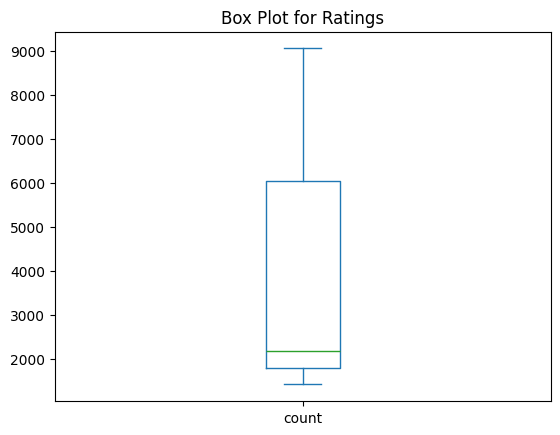

In [7]:
data['Rating'].value_counts().plot(kind='box', title = 'Box Plot for Ratings') #to check how the data is skewed

<Axes: title={'center': 'Bar plot for Ratings'}, xlabel='Rating'>

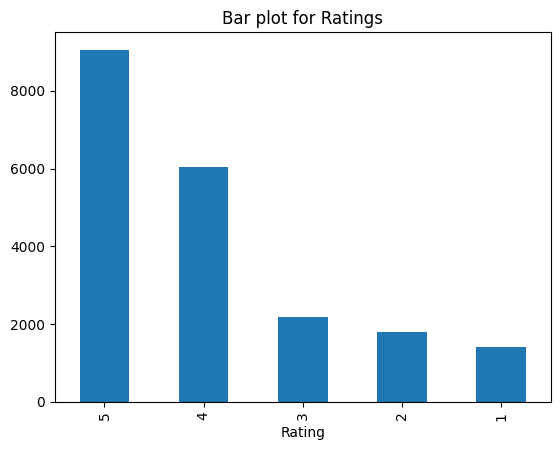

In [8]:
data['Rating'].value_counts().plot(kind='bar', title='Bar plot for Ratings')

## Feature Engineering

In [9]:
#Creating a new column that classifies the reviews based on the rating.

### The reviews are classifed into three categories:
*Positive (4 or 5 rating)
*Negative(1 or 2 star rating)
*Neutral (3 star rating)

In [10]:
def emotion_classification(rating):
    if rating>=4:
        return "Positive"
    elif rating<=2:
        return "Negative"
    else:
        return "Neutral"

In [11]:
data['Rating_emotion'] = data['Rating'].apply(emotion_classification)

In [12]:
data[data['Rating_emotion']=="Negative"]

,Review,Rating,Rating_emotion
1,ok nothing special charge diamond member hilto...,2,Negative
10,"poor value stayed monaco seattle july, nice ho...",2,Negative
15,horrible customer service hotel stay february ...,1,Negative
16,disappointed say anticipating stay hotel monac...,2,Negative
24,great location need internally upgrade advanta...,2,Negative
...,...,...,...
20484,deceptive staff deceptive desk staff claiming ...,2,Negative
20485,not impressed unfriendly staff checked asked h...,2,Negative
20488,"ok just looks nice modern outside, desk staff ...",2,Negative
20489,hotel theft ruined vacation hotel opened sept ...,1,Negative


In [13]:
data[data['Rating_emotion']=="Positive"].shape[0]/data.shape[0]

0.7365672734371187

In [14]:
data[data['Rating_emotion']=="Negative"].shape[0]/data.shape[0]

0.15684934849446097

In [15]:
data[data['Rating_emotion']=="Neutral"].shape[0]/data.shape[0]

0.10658337806842028

###### The data is imbalanced and to account for it, we need to make sure that this ratio remains the same after splitting the data into train and test datasets.

## Defining the independent and dependent variables

In [16]:
X = data['Review']
y = data['Rating_emotion']

## Splitting the dataset into training and test data

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
X_train

11710    outstanding cleanliness value location wanted ...
10444    cheap cheerful hey not sure fuss picked hotel ...
19183    sensational hotel stayed hotel renew 2-10 nove...
14261    nice spent 3 nights easter nice little hotel f...
1989     overall good experience enjoyed staying hotel ...
                               ...                        
11284    worth money no complaints place beautiful, sta...
11964    stellar experience stayed night pleasantly sur...
5390     best location town aquarium, soon enter hotel ...
860      amazing place amazing location amazing food, p...
15795    loved want, hotel fantastic, stayed season hot...
Name: Review, Length: 16392, dtype: object

In [19]:
X_test

10726    not recommend hotel did reviewers actually sta...
14919    barcelona rocks, stayed hotel jazz girlfriend ...
19098    ok hotel good location stayed night way beijin...
2450     great service nice pool ok beach lovely ground...
960      surprising treat spent weekend july 15/16 2006...
                               ...                        
1576     staff friendly hotel rooms bit tatty recently ...
18714    magnificent date august 5 2008reviewer trip ad...
12690    not bad business trip food, hotel n't bad did ...
18095    great choice travelling car got great rate loo...
11836    fantastic stay, rated best mexico trip husband...
Name: Review, Length: 4099, dtype: object

In [20]:
prob_positive_data = data[data['Rating_emotion']=="Positive"].shape[0]/data.shape[0] #probability of finding a positive review in the full dataset

In [21]:
prob_positive_train_data = sum(y_train=='Positive')/y_train.shape[0]  #probability of finding a positive review in the training data

In [22]:
prob_positive_test_data = sum(y_test=='Positive')/y_test.shape[0] #probability of finding a positive review in the test data

In [23]:
prob_positive_data, prob_positive_train_data, prob_positive_test_data

(0.7365672734371187, 0.7351756954612005, 0.7421322273725299)

###### The probability of finding a positive review in the training and test data remains the same as the full dataset

In [24]:
prob_negative_data = sum(y_train=='Negative')/y_train.shape[0] #probability of finding a negative review in the full dataset

In [25]:
prob_negative_train_data = sum(y_train=='Negative')/y_train.shape[0] #probability of finding a negative review in the training data

In [26]:
prob_negative_test_data = sum(y_test=='Negative')/y_test.shape[0] #probability of finding a negative review in the test data

In [27]:
prob_negative_data, prob_negative_train_data, prob_negative_test_data

(0.1579428989751098, 0.1579428989751098, 0.15247621371066114)

##### The probability of finding a negative review in the training and test data remains the same as the full dataset

In [28]:
prob_neutral_data = sum(y_train=='Neutral')/y_train.shape[0] #probability of finding a neutral review in the full dataset

In [29]:
prob_neutral_train_data = sum(y_train=='Neutral')/y_train.shape[0] #probability of finding a neutral review in the training data

In [30]:
prob_neutral_test_data = sum(y_test=='Neutral')/y_test.shape[0] #probability of finding a neutral review in the test data

In [31]:
prob_neutral_data, prob_neutral_train_data, prob_neutral_test_data

(0.10688140556368961, 0.10688140556368961, 0.10539155891680897)

###### The probability of finding a neutral review in the training and test data remains the same as the full dataset

## Data Preprocessing of Training Data

In [32]:
stop_words = set(stopwords.words('english'))

In [33]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [34]:
stemmer = PorterStemmer()

In [35]:
def text_preprocess(text):
    
    text = text.lower() #convert all the characters to lower-case
    
    pattern = "[^a-zA-Z]" 
    text = re.sub(pattern, " ", text) #exclude every character that is not an alphabet (,.-0-9)

   
    tokenized_words = word_tokenize(text) #split the sentences into words using word_tokenize
    
    stem_words = []
    for word in tokenized_words:
        if word not in stop_words: #stopword removal
            preprocessed_words = stemmer.stem(word) #using stemmer, get only the core of each word
            stem_words.append(preprocessed_words)

    words = " ".join(stem_words) #joining the items of the list to form a string
            
    return words

In [36]:
X_train_preprocessed = X_train.apply(text_preprocess)

In [37]:
X_train.iloc[1]

'cheap cheerful hey not sure fuss picked hotel price got paid for.dont wrong not palace clean tidy warm honest expecting grander check little paid think again.the rooms basic livable.the location not bad free public ferry leaves central station leaves 150 metres botel cant crying, lazy arses thinks.the use mini bus collection returning home little worse wear early hours evening hassle free.there nice restaurant bar situated end quay botel docked, dont think anybody mentioned,  '

In [38]:
X_train_preprocessed.iloc[1]

'cheap cheer hey sure fuss pick hotel price got paid dont wrong palac clean tidi warm honest expect grander check littl paid think room basic livabl locat bad free public ferri leav central station leav metr botel cant cri lazi ars think use mini bu collect return home littl wors wear earli hour even hassl free nice restaur bar situat end quay botel dock dont think anybodi mention'

In [39]:
#After preprocessing, the text only contains core parts of important words that add significant value to the rating given

In [40]:
X_train_preprocessed

11710    outstand cleanli valu locat want stay central ...
10444    cheap cheer hey sure fuss pick hotel price got...
19183    sensat hotel stay hotel renew novemb felt comp...
14261    nice spent night easter nice littl hotel frien...
1989     overal good experi enjoy stay hotel locat view...
                               ...                        
11284    worth money complaint place beauti staff help ...
11964    stellar experi stay night pleasantli surpris a...
5390     best locat town aquarium soon enter hotel spec...
860      amaz place amaz locat amaz food place great su...
15795    love want hotel fantast stay season hotel wasr...
Name: Review, Length: 16392, dtype: object

### Vectorize the preprocessed text

In [41]:
vectorizer = TfidfVectorizer()

In [42]:
X_train_numerical = vectorizer.fit_transform(X_train_preprocessed)

In [43]:
X_train_numerical

<16392x31843 sparse matrix of type '<class 'numpy.float64'>'
	with 1231802 stored elements in Compressed Sparse Row format>

## Data Preprocessing of Test data

In [44]:
X_test_preprocessed = X_test.apply(text_preprocess)

In [45]:
X_test_num = vectorizer.transform(X_test_preprocessed)

In [46]:
X_test_num

<4099x31843 sparse matrix of type '<class 'numpy.float64'>'
	with 304117 stored elements in Compressed Sparse Row format>

## Building and Evaluating Models using few classification algorithms

In [47]:
import warnings
warnings.simplefilter("ignore")

In [48]:
def train_test_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    train_score = accuracy_score(y_train, y_train_pred)
    y_test_pred = model.predict(X_test)
    test_score = accuracy_score(y_test, y_test_pred)
    
    return train_score, test_score


In [49]:
models = [MultinomialNB(), LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier()]

In [50]:
for model in models:
    print("Model_name: ", str(model).strip("()"))
    print(train_test_score(model, X_train_numerical, X_test_num, y_train, y_test))

Model_name:  MultinomialNB
(0.7434724255734505, 0.7457916565015857)
Model_name:  LogisticRegression
(0.9051976573938506, 0.8589899975603806)
Model_name:  DecisionTreeClassifier
(1.0, 0.7345694071724811)
Model_name:  RandomForestClassifier
(1.0, 0.7958038545986826)


In [51]:
#When using MultinomialNB, both the train score and test score are low
#LogisticRegression gave 90% train score and 85% test score, which are comparable and quite high, making this a good model
#Both DecisionTreeClassifier and RandomForestClassifier are overfitting since the train score is perfect whereas the test score is quite low.

###### Hence, LogisticRegression is the best performing model

## Saving the trained model

In [52]:
log_reg = LogisticRegression()

In [53]:
lr = log_reg.fit(X_train_numerical, y_train)

In [54]:
import os
os.getcwd()

'C:\\Users\\91852\\PDIC Hackathon'

In [55]:
os.chdir(r'C:\Users\91852\Desktop\VS code\Sentiment_analysis_deployment')

In [56]:
pickle.dump(lr, open("lr_model.pkl", 'wb'))

In [57]:
pickle.dump(X_train_preprocessed, open("X_train_preprocessed.pkl", "wb")) 